In [17]:
import scanpy as sc
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LassoCV
import ast
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
family_to_color = {
    'IL-1': '#2D2D2A',
    'IL-10': '#4C4C47',
    'IL-17': '#686E76',
    'IL-6/IL-12': '#848FA5',
    'IL-10 (IL-20 subfamily)': '#B9BFCB',
    'Interleukin - non-classified': '#DCDFE5',
    'Interferon': '#947E91',
    'Common γ chain/IL-13/TSLP': '#C14953',
    'TNF': '#D3938C',
    'Growth factor': '#E1C3B7',
    'Other': '#E5DCC5',
    
    'Common β chain': '#B76F52',
    'Chemokine': '#D0B4BC',
    'Complement': '#7F6B39'
}

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/optuna/study/_optimize.py:29: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


In [37]:
data_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/feature_importance"
output_dir = "/lustre/groups/ml01/workspace/ot_perturbation/figures/pbmc/data/donor_feature_importance"

In [56]:
dfs = []
cts = []
for f in os.listdir(data_dir):
    dfs.append(pd.read_csv(os.path.join(data_dir, f), index_col=0))
    cts.append("_".join(f.split("_")[:-2]))

In [57]:
df_all=pd.concat(dfs)
df_all.min().min()

-8.345554420526351

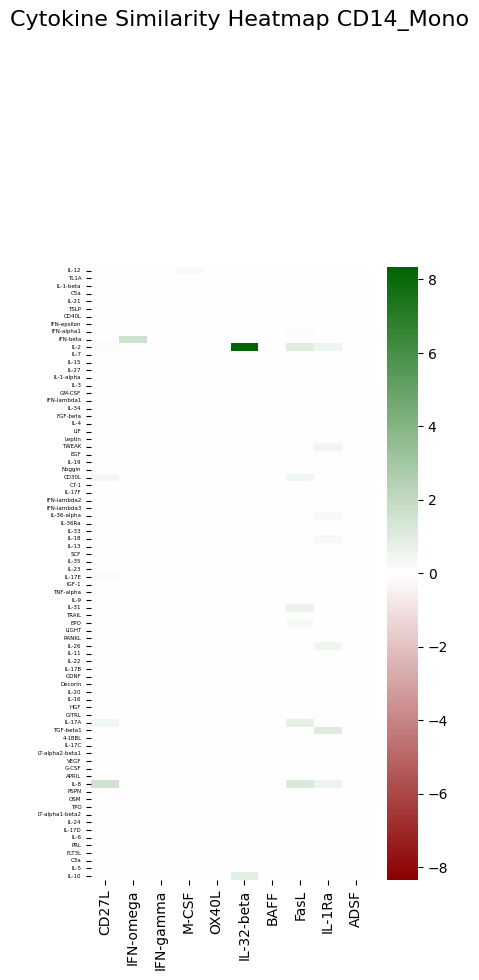

In [58]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 0
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


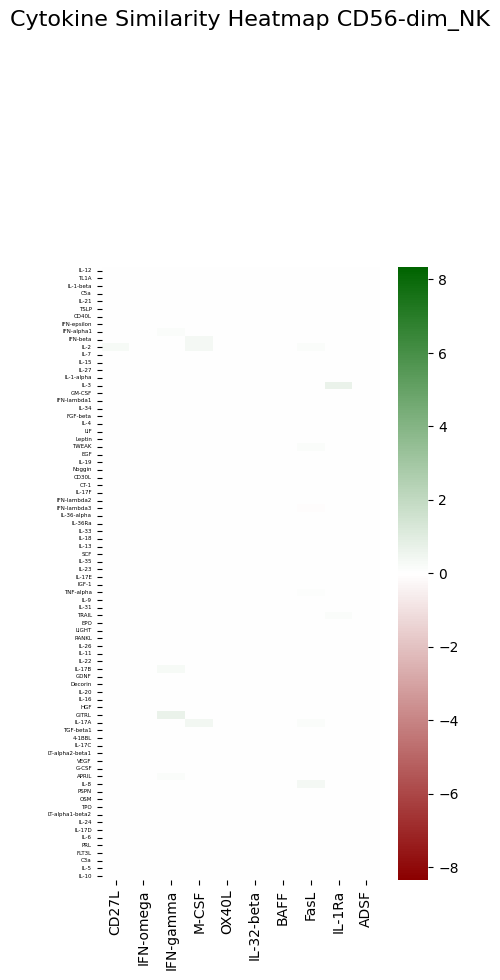

In [59]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 1
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


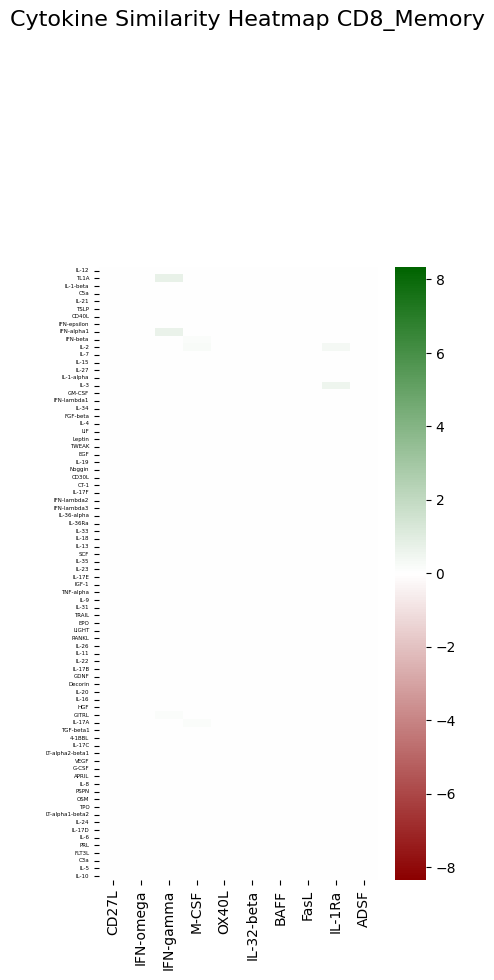

In [60]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 2
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


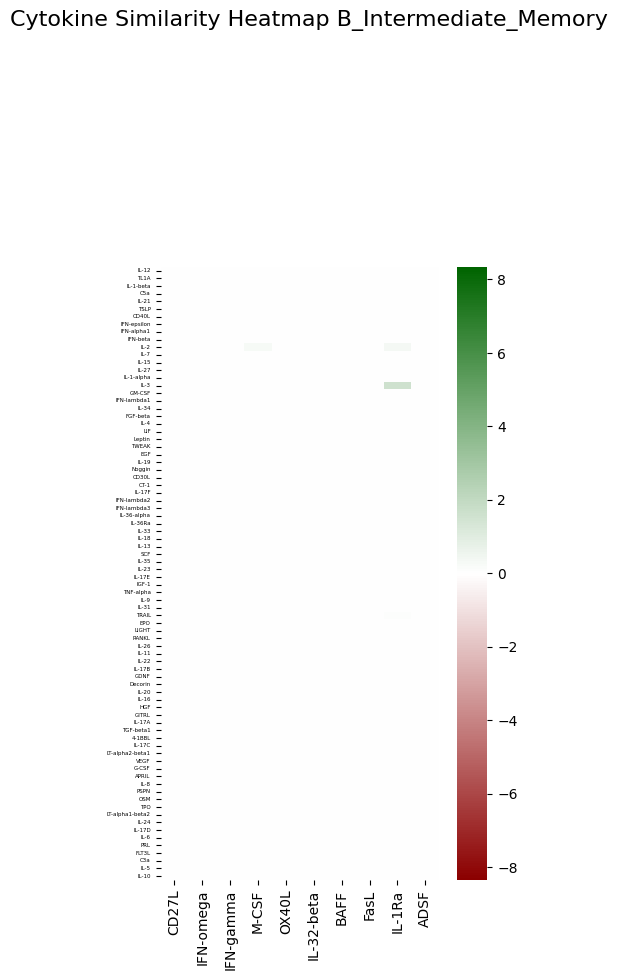

In [61]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 3
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


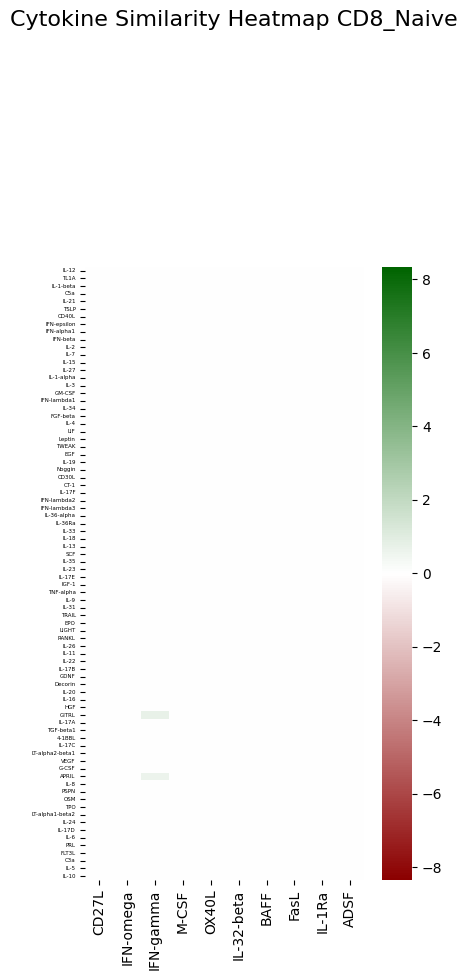

In [62]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 4
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


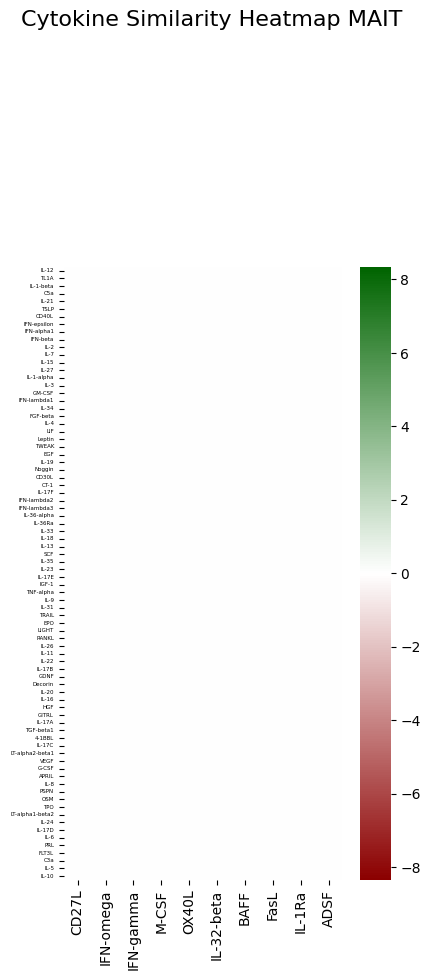

In [63]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 5
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


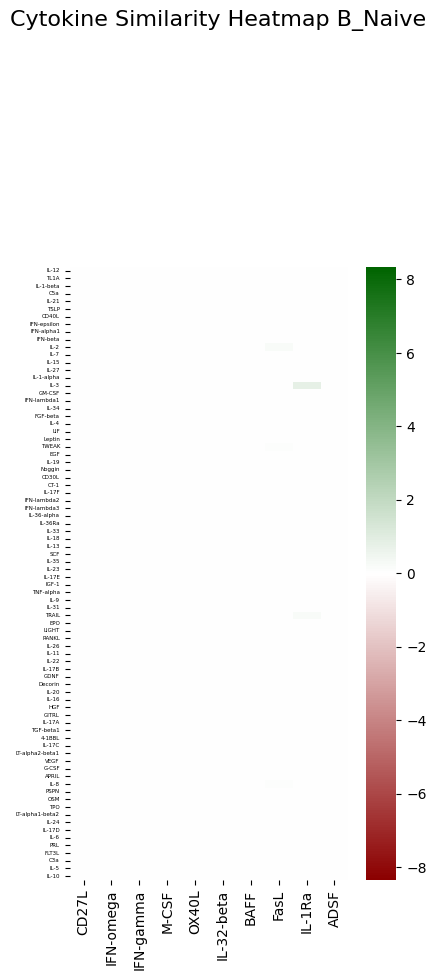

In [64]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 6
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


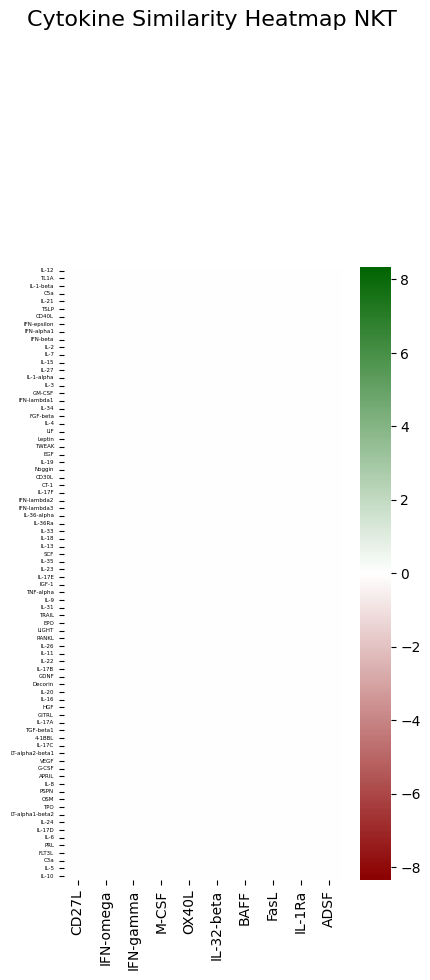

In [65]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 7
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


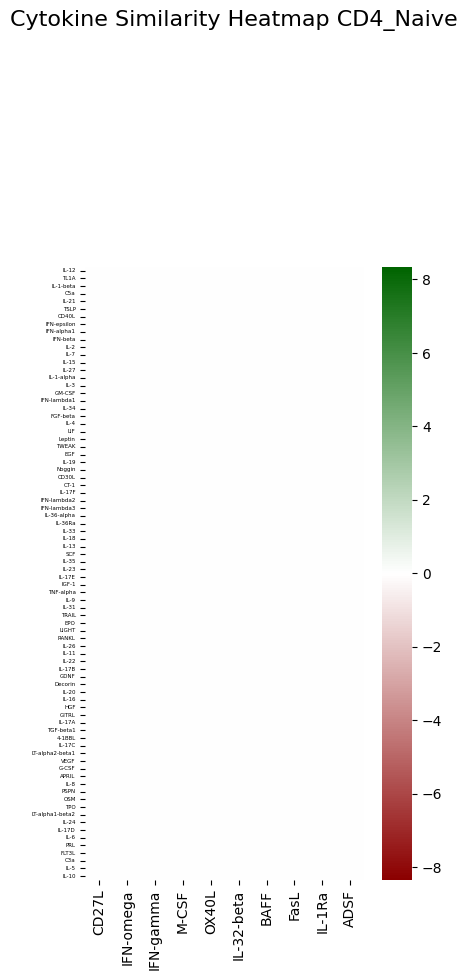

In [66]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 8
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


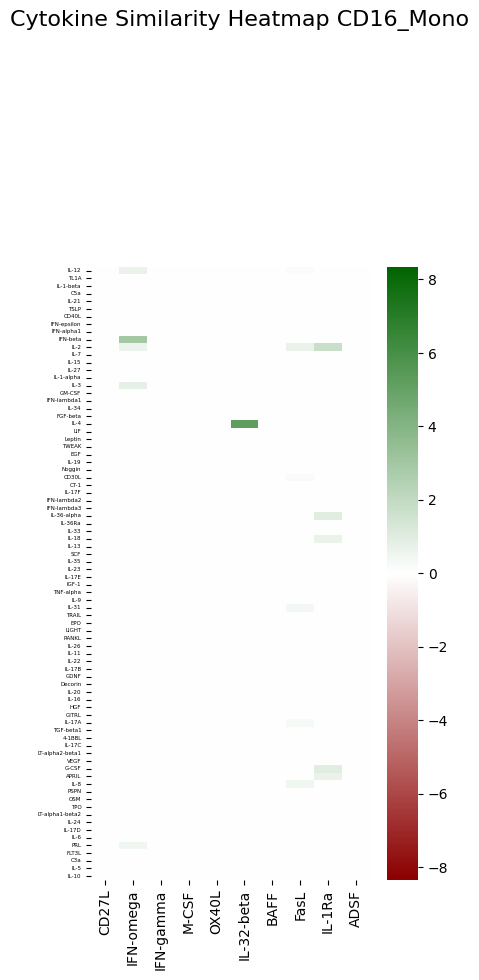

In [67]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 9
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


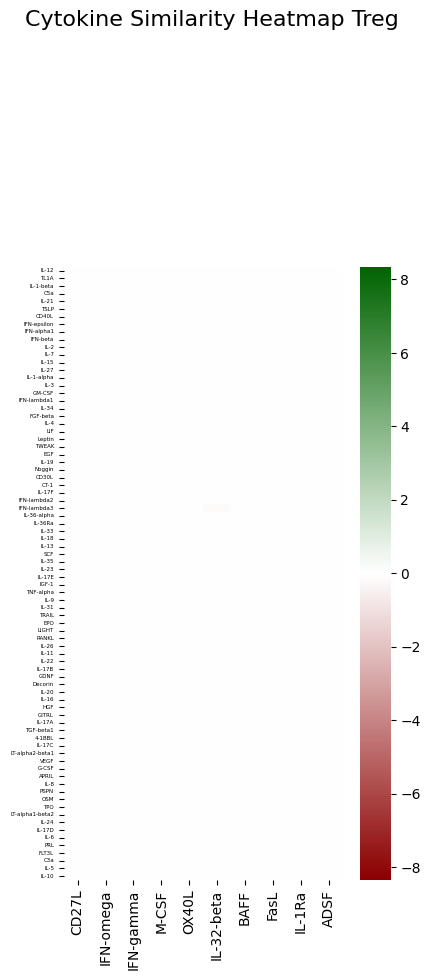

In [68]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 10
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


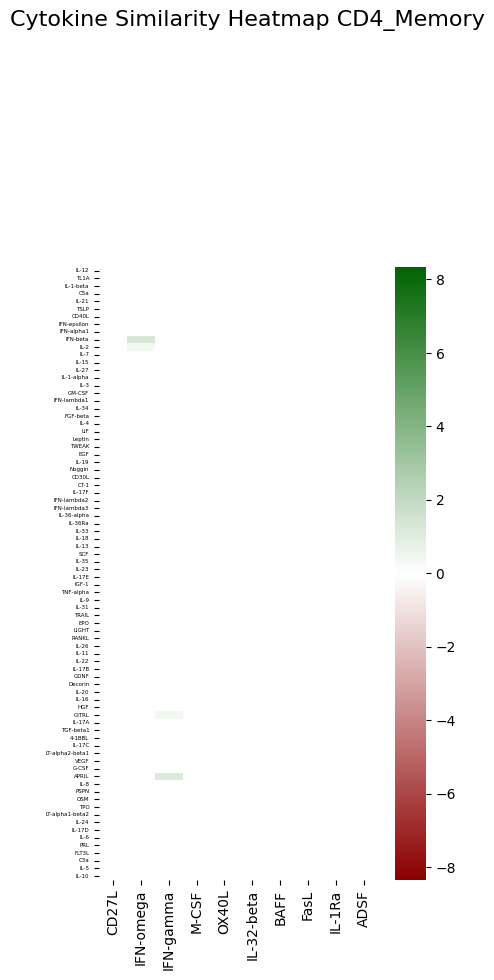

In [69]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 11
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()


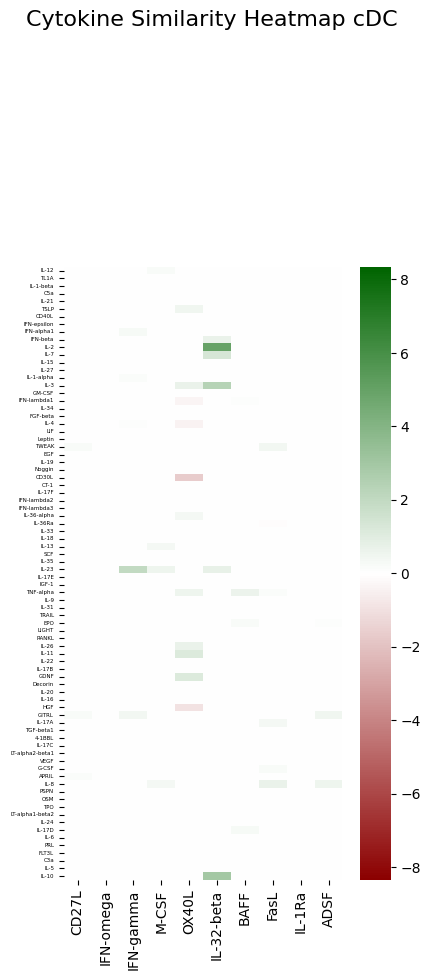

In [70]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Assume that cts, dfs, df_all, and output_dir are already defined.
index = 12
ct = cts[index]
df = dfs[index]

# Set up the grid
fig = plt.figure(figsize=(5, 10))
grid = fig.add_gridspec(5, 10, wspace=0.1, hspace=0.1)

# Fixed range values for the colormap.
# Here we set fixed_vmax from your df_all and assume symmetry.
fixed_vmax = -df_all.min().min()  # Must be positive for this to work as expected.
fixed_vmin = -fixed_vmax          # Ensuring symmetry so that 0 is centered.

# Compute the normalized midpoint where 0 occurs.
# Normalized position: (value - vmin) / (vmax - vmin)
midpoint = (0 - fixed_vmin) / (fixed_vmax - fixed_vmin)

# Create a diverging colormap with darkred at fixed_vmin, white at 0, and darkgreen at fixed_vmax.
diverging_cmap = LinearSegmentedColormap.from_list(
    "diverging_cmap",
    [(0.0, "darkred"), (midpoint, "white"), (1.0, "darkgreen")]
)

# Create a Normalize instance with the fixed limits
norm = Normalize(vmin=fixed_vmin, vmax=fixed_vmax)
sm = ScalarMappable(cmap=diverging_cmap, norm=norm)
sm.set_array([])  # Required for adding a colorbar later if desired

# Preprocess y-axis labels to remove "_present"
yticks = [label.replace("_present", "") for label in df.columns]

# Main heatmap (using the transpose of df)
ax_main = fig.add_subplot(grid[1:, 1:])
sns.heatmap(
    -df.T,            # Inverting the values if needed
    cmap=diverging_cmap,
    norm=norm,        # Use our fixed normalization
    xticklabels=True,
    yticklabels=yticks,
    ax=ax_main
)

# Reduce y-axis label size
ax_main.tick_params(axis="y", labelsize=4)

# Add a title
fig.suptitle(f"Cytokine Similarity Heatmap {ct}", fontsize=16)

# Save the figure
plt.savefig(
    os.path.join(output_dir, f"new_donor_feature_importance_{ct}.pdf"),
    format="pdf",
    bbox_inches="tight"
)

plt.show()
